## Systems Biology Problem Set 
### IL181.027 
### Supplementary code
Marcela Radilla Deloya 

**Problem 1**

In [ ]:
#distributions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

Gaussian 
$(μ=10, σ^2 =2.5)$

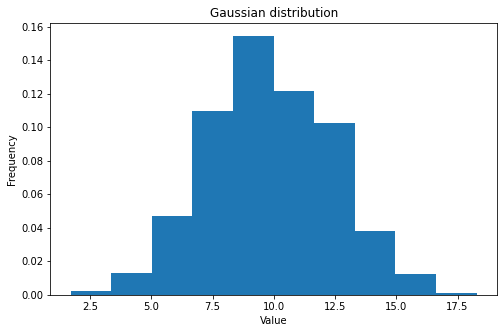

Mean: 9.841114625051762
Variance: 6.402925480939184
95% CI:[5.005864469687079, 14.64750757547153]


In [24]:
#x=np.linspace(0,1,num=1000)
gaussian_x=sts.norm.rvs(loc=10,scale=2.5, size=1000)
plt.figure(figsize=(8, 5))
plt.hist(gaussian_x,density=True)
plt.title('Gaussian distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print("Mean:", np.mean(gaussian_x))
print("Variance:", np.var(gaussian_x))
print("95% CI:[{}, {}]".format(np.percentile(gaussian_x, 2.5), np.percentile(gaussian_x, 97.5)))


Poisson $(λ=2)$

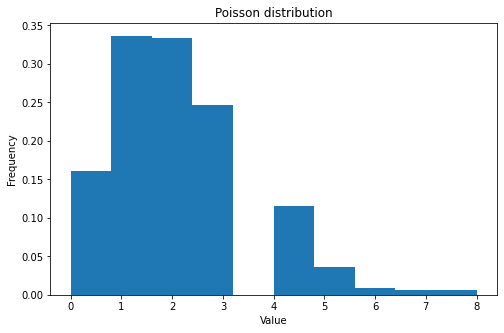

Mean: 2.024
Variance: 2.027424
95% CI:[0.0, 5.0]


In [26]:
lambda_p=2
poi_x=sts.poisson.rvs(mu=lambda_p,size=1000)
plt.figure(figsize=(8, 5))
plt.hist(poi_x,density=True)
plt.title('Poisson distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print("Mean:", np.mean(poi_x))
print("Variance:", np.var(poi_x))
print("95% CI:[{}, {}]".format(np.percentile(poi_x, 2.5), np.percentile(poi_x, 97.5)))


Negative Binomial $(r=4, p=0.3)$

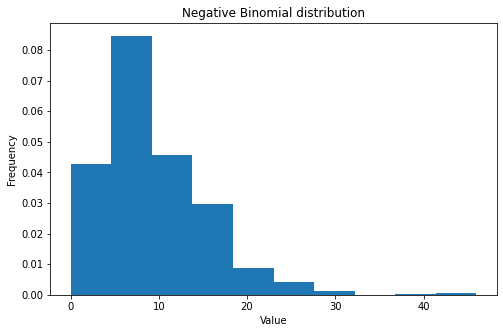

Mean: 9.384
Variance: 34.184543999999995
95% CI:[1.0, 23.024999999999977]


In [28]:
r=4
p=0.3 
negbinom_x=sts.nbinom.rvs(n=r,p=p,size=1000)
plt.figure(figsize=(8, 5))
plt.hist(negbinom_x,density=True)
plt.title('Negative Binomial distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print("Mean:", np.mean(negbinom_x))
print("Variance:", np.var(negbinom_x))
print("95% CI:[{}, {}]".format(np.percentile(negbinom_x, 2.5), np.percentile(negbinom_x, 97.5)))


Beta binomial $(α=0.1, β=3, n = 500)$

(1000 trials)

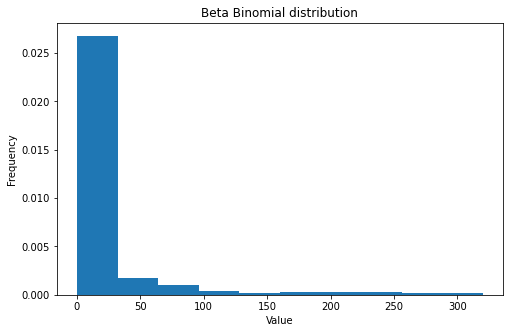

Mean: 18.116
Variance: 2451.002544
95% CI:[0.0, 203.07499999999993]


In [34]:
alpha=0.1
beta=3
n=500
beta_bin_x=sts.betabinom.rvs(n=n,a=alpha,b=beta,size=1000)
plt.figure(figsize=(8, 5))
plt.hist(beta_bin_x,density=True)
plt.title('Beta Binomial distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print("Mean:", np.mean(beta_bin_x))
print("Variance:", np.var(beta_bin_x))
print("95% CI:[{}, {}]".format(np.percentile(beta_bin_x, 2.5), np.percentile(beta_bin_x, 97.5)))


Gamma $(θ = 2.3, k = 1)$

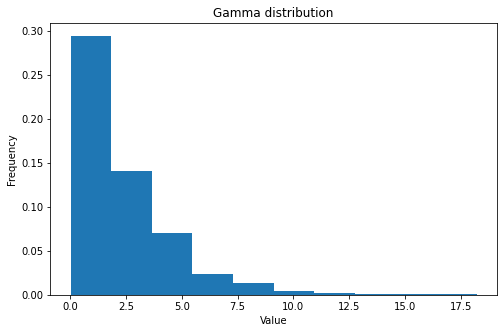

Mean: 2.3346979197567834
Variance: 5.030772116632457
95% CI:[0.10390809958447099, 8.270630860091387]


In [36]:
theta=2.3
k=1
gamma_x=sts.gamma.rvs(a=k, scale=theta,size=1000)
plt.figure(figsize=(8, 5))
plt.hist(gamma_x,density=True)
plt.title('Gamma distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print("Mean:", np.mean(gamma_x))
print("Variance:", np.var(gamma_x))
print("95% CI:[{}, {}]".format(np.percentile(gamma_x, 2.5), np.percentile(gamma_x, 97.5)))


Power Law $(α=2, k=1)$

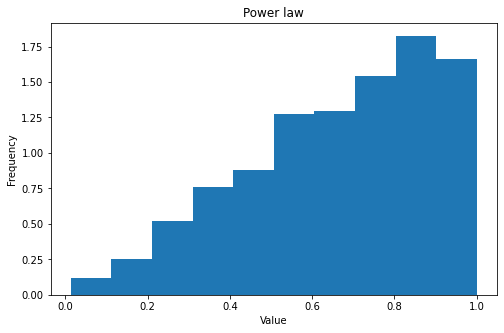

Mean: 0.6628749539735694
Variance: 0.0523713999797274
95% CI:[0.18970779810570243, 0.9870227787466596]


In [39]:
alpha=2
k=1
power_x=sts.powerlaw.rvs(a=alpha, scale=k,size=1000)
plt.figure(figsize=(8, 5))
plt.hist(power_x,density=True)
plt.title('Power law')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print("Mean:", np.mean(power_x))
print("Variance:", np.var(power_x))
print("95% CI:[{}, {}]".format(np.percentile(power_x, 2.5), np.percentile(power_x, 97.5)))


**Problem 2B**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import scipy as sp
import scipy.stats as sts
from scipy.optimize import minimize
from scipy.special import factorial

Question 1 

In [56]:
data = [3, 2, 1, 1, 5, 2, 4, 5, 6, 6]

### TODO: find mean and variance
print("Mean:", np.mean(data))
print("Variance:", np.var(data))

Mean: 3.5
Variance: 3.45


Question 2 

In [57]:
def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)


def negative_log_likelihood(params, data):
    return -np.sum(np.log(poisson(data, params[0])))

def negative_log_likelihood(params, data):
    return -sts.poisson.logpmf(data, params[0]).sum()

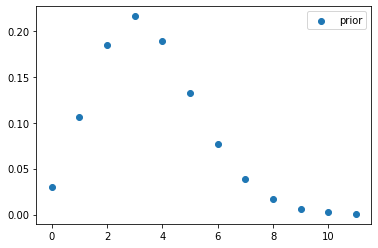

In [59]:
# source: https://stackoverflow.com/a/25828558

# MLE: minimize the negative log-likelihood
result = minimize(negative_log_likelihood,  # function to minimize
                  x0=np.ones(1),            # start value
                  args=(data,),             # additional arguments for function
                  method='Powell',          # minimization method, see docs
                  )

# index for x-axis, number of moldy spots 
k = np.arange(0, 12)

# get the density values for each x
prior = sts.poisson.pmf(k, mu=result.x)

plt.scatter(k, prior,label='prior')
plt.legend()
plt.show()

**Problem 2C**

Question 1


In [64]:
### TODO: new observations and combined list here
new_data = [1,0,4,11,3,4,9,0,3,8,1,2,2,4,3,4,1,3,1,4]
all_data = data + new_data

In [65]:
### TODO: print out mean and variance of all the data
print("Mean:", np.mean(all_data))
print("Variance:", np.var(all_data))

Mean: 3.433333333333333
Variance: 6.578888888888889


Question 2 

For the likelihood, we pick something with positive support, such as a truncated normal distribution since we cannot have negative number of mold spot counts.



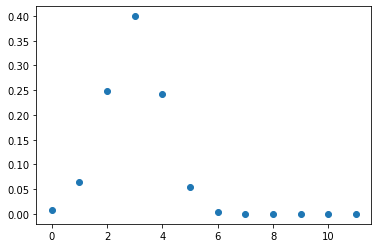

In [66]:
lower_limit = 0
upper_limit = np.inf
sigma = 1  # std for likelihood

def likelihood(datum):
    likelihood_dist = sts.truncnorm.pdf(
        datum,
        (lower_limit - k) / sigma,
        (upper_limit - k) / sigma,
        loc=k,
        scale=sigma
    )

    return likelihood_dist

plt.scatter(k, likelihood(3))  # example likelihood of a datapoint k = 3
plt.show()

Reminder about Bayesian update rule:

$P(\theta|X) = \dfrac{P(X|\theta)P(\theta)}{P(X)}$,

where:

$\theta$ is the distribution parameter
$X$ is the observation
$P(\theta|X)$ is the posterior distribution (PDF)
$P(\theta)$ is the prior distribution (PDF)
$P(X|\theta)$ is the likelihood distribution (not a PDF)
$P(X)$ is the evidence (we don't need this as we will just divide by the area under PDF curve)

In [67]:
unnormalized_posterior = copy.deepcopy(prior)

for datum in new_data:
    lklhd = likelihood(datum)
    
    ### TODO: what is the posterior? (hint: you can forget about P(X) for now)
    unnormalized_posterior *= lklhd
    
# normalize the posterior so that area under this new PDF adds up to 1
area = sp.integrate.trapz(unnormalized_posterior, k) + 1e-10000
posterior = unnormalized_posterior / area

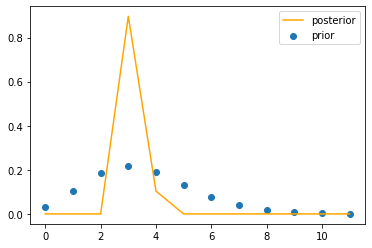

In [68]:
# comparing posterior to the prior
plt.scatter(k, prior, label="prior")
plt.plot(k, posterior, label="posterior", color="orange")
plt.legend()
plt.show()

In [69]:
### TODO: recover the estimated mean of the number of moldy spots from the posterior
# HINT: probability density is a weighting of each data point in the discrete distribution (such as ours)
mean = np.sum(posterior*k)  # expression containing `k` and `posterior`

In [71]:
#posterior mean
mean

3.1034083903225778